# Libraries

In [54]:
import pandas as pd
import numpy  as np
import string 
import re
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
# import nltk
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer
# #from nltk.tokenize.treebank import TreebankWordDetokenizer
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
#from nltk.corpus import stopwords

from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
import gensim.downloader as api

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import pickle

from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping

print('Done')



Done


# Data

In [2]:
pd.set_option('max_colwidth', None) 
df = pd.read_csv("~/Downloads/banData/MeTooHate.csv")[["text", "category"]]
df.head()

,text,category
0,"Entitled, obnoxious, defensive, lying weasel. This thing is to make decisions that may affect my life? He is a women hater.",0
1,Thank you and for what you did for the women and survivors this week. \n,0
2,"Knitting (s) &amp; getting ready for January 19, 2019.",0
3,"Yep just like triffeling women weaponized their poon!! Wonder if Kamala Harris ever extorted Willy Brown after throwing the poon on him, oh yeh, that how she got her first job me too is a JOKE!",1
4,"No, the President wants to end movement posing as the movement.",0


In [3]:
N =100
# df1 = df[df["category"]== 1]
# df1 = df[df["category"]== 1].dropna()
df0 = df[df["category"]== 0].dropna()
# df = pd.concat([df0.sample(df1.shape[0]), df1], axis = 0)

# #shuffle rows
# df = df.sample(frac=1)
# df.shape
# df.reset_index(inplace = True)


# y = df["category"]
# X = df.drop(columns = ["category"]) 


## Import relabelled data

In [4]:
! ls ../raw_data

abusive_words.csv  abusive_words_list.txt  filter_df  Untitled.ipynb


In [5]:
# test = df.head(100)
# test["label"] = test["category"]
# #test[test[score> 200]]["label"] = 2

with open('../raw_data/filter_df', 'rb') as handle:
    filter_df = pickle.load(handle)


filter_df.head()

,text,category,scoring_ponctuation,scoring_capital_word,scoring,relabelling
3,"Yep just like triffeling women weaponized their poon!! Wonder if Kamala Harris ever extorted Willy Brown after throwing the poon on him, oh yeh, that how she got her first job me too is a JOKE!",1,0,3,3,1
7,"Save it for Fox Fake News—watched by racists, bigots &amp; other women-hating sexists like yourself. GOP is the party of Putin &amp; the party of Hate—besides women, GOP hates all POC, immigrants, and all ppl not straight. You’re the party of the entitled lying whiny white men.",1,0,9,9,1
49,"As a white male in this era I'm just scared that if I decide to rape or sexually assault a woman, it can be used against me years later. How am I supposed to ask a girl out?!",1,0,6,6,1
57,I heard that received some Shush/Slush money to settle rape charges by her aide who said she just could not remember where or when. . .,1,0,3,3,1
60,"If she hasn't, it's because of people like you shaming her! How dare you tell her how she is or should be feeling! That is why I HATE the movement. Along with all of the other movements! You rape these people to further a political objective! You are despicable!",1,0,6,6,1


In [6]:
filter_df.columns

Index(['text', 'category', 'scoring_ponctuation', 'scoring_capital_word',
       'scoring', 'relabelling'],
      dtype='object')

## Select samples from df0

In [7]:
df2 = filter_df[filter_df["relabelling"]==2]
df2.head()
df2["label"] = df2["relabelling"]

score_punctuation = [score if score==0 else 1 for score in df2["scoring_ponctuation"]]
score_capital_word = [score if score==0 else 1 for score in df2["scoring_capital_word"]]

df2["score_punctuation"] = score_punctuation
df2["score_capital_word"] = score_capital_word

In [8]:
score_punctuation = [score if score==0 else 1 for score in df2["scoring_ponctuation"]]
score_capital_word = [score if score==0 else 1 for score in df2["scoring_capital_word"]]

df2["score_punctuation"] = score_punctuation
df2["score_capital_word"] = score_capital_word

In [9]:
df2["score_punctuation"] = score_punctuation
df2["score_capital_word"] = score_capital_word

In [10]:
df2.head()

,text,category,scoring_ponctuation,scoring_capital_word,scoring,relabelling,label,score_punctuation,score_capital_word
78,"Trust me...Not like I did. I'm 61 &amp; to this day I cringe at some of the shit I did. I never sexually assaulted anyone. But, I did things that were flat out wrong under . If I ran into any ladies from 40 years ago, I'd take a knee to apologize. Kavanaugh needs to do same.",1,0,18,23,2,2,0,1
200,BELIEVE HER!!!!!!!!!!!!!!!!!!!!!!!!!!!! !!!!!!!!!!!!!!!! BELIEVE BELIEVE BELIEVE!!!!!!!! \n\nYou fucking hypocrite loser,1,9,15,29,2,2,1,1
233,"I used to dream of marrying a nice man and living happily ever after, like the romance books.\nNow I dream of having a fantastic job, a lovely home and children. I don’t need a spouse to make me happy, I can learn how to do it on my own.\n\nThat’s what my own events have done",1,0,12,12,2,2,0,1
340,"IT’S AS IF ISN’T REALLY ABOUT FAIRNESS AND EQUALITY AT ALL: “If your friend says she wants to cut off every dick in a five mile radius, let her!”\n\n",1,0,33,33,2,2,0,1
538,"Partial checklist for women before leaving the house:\n1. dress 2 tight?\n2. breasts 2 big/2 obvious?\n3. ass 2 curvy?\n4. skirt 2 short/2 sexy?\n5. hair 2 seductive?\n6. make-up 2 sexy?\n7. Will I b harassed?\n8. Are you ready, Girl?\nMen:\n1. Did I pee?\n",1,0,6,11,2,2,0,1


In [11]:
df2.drop(columns = ["category","scoring_ponctuation","scoring_capital_word","scoring","relabelling"], inplace = True)
df2.head()

,text,label,score_punctuation,score_capital_word
78,"Trust me...Not like I did. I'm 61 &amp; to this day I cringe at some of the shit I did. I never sexually assaulted anyone. But, I did things that were flat out wrong under . If I ran into any ladies from 40 years ago, I'd take a knee to apologize. Kavanaugh needs to do same.",2,0,1
200,BELIEVE HER!!!!!!!!!!!!!!!!!!!!!!!!!!!! !!!!!!!!!!!!!!!! BELIEVE BELIEVE BELIEVE!!!!!!!! \n\nYou fucking hypocrite loser,2,1,1
233,"I used to dream of marrying a nice man and living happily ever after, like the romance books.\nNow I dream of having a fantastic job, a lovely home and children. I don’t need a spouse to make me happy, I can learn how to do it on my own.\n\nThat’s what my own events have done",2,0,1
340,"IT’S AS IF ISN’T REALLY ABOUT FAIRNESS AND EQUALITY AT ALL: “If your friend says she wants to cut off every dick in a five mile radius, let her!”\n\n",2,0,1
538,"Partial checklist for women before leaving the house:\n1. dress 2 tight?\n2. breasts 2 big/2 obvious?\n3. ass 2 curvy?\n4. skirt 2 short/2 sexy?\n5. hair 2 seductive?\n6. make-up 2 sexy?\n7. Will I b harassed?\n8. Are you ready, Girl?\nMen:\n1. Did I pee?\n",2,0,1


## Add new colonnes to df0

In [12]:
df0["label"] = df0["category"]
df0.drop(columns =["category"], inplace = True)

df0["score_punctuation"] = 0
df0["score_capital_word"] = 0
df0.head()

,text,label,score_punctuation,score_capital_word
0,"Entitled, obnoxious, defensive, lying weasel. This thing is to make decisions that may affect my life? He is a women hater.",0,0,0
1,Thank you and for what you did for the women and survivors this week. \n,0,0,0
2,"Knitting (s) &amp; getting ready for January 19, 2019.",0,0,0
4,"No, the President wants to end movement posing as the movement.",0,0,0
5,Lock Justin Timberlake up he raped JANET JACKSON.,0,0,0


In [13]:
#shuffle rows before sampling
df0 = df0.sample(frac=1)
df0.shape
#df.reset_index(inplace = True)

# sample 2N
df0_sample = df0.head(2*df2.shape[0])
print(df0_sample.shape)

(20182, 4)


In [14]:

# new df
df = pd.concat([df0_sample, df2], axis = 0)
print(df.shape)

# reshuffle and set index
df = df.sample(frac=1)
print(df.shape)
df.reset_index(inplace = True)

df.reset_index(inplace = True)
#df = df.drop(columns = ["level_0","index"], inplace = True) 
df.head()

(30273, 4)
(30273, 4)


In [15]:
df.reset_index(inplace = True)
#df = df.drop(columns = ["level_0","index"], inplace = True) 
df.head()

,level_0,index,text,label,score_punctuation,score_capital_word
0,0,449217,TEN PER CENT of men don’t think that taking a photograph up a woman’s skirt without her permission is harassment. Seriously. Who the FUCK are these insects?!?!,2,0,1
1,1,197860,Where is the movement on helping to make sure this happens? ?,0,0,0
2,2,47004,It’s obvious from Judge K &amp; Doofus Trump that sex predators have as much (or more) trouble remembering their assaults than the victims do.,0,0,0
3,3,496028,", delighted I am, Jim Acosta is overdue for a spanking.",0,0,0
4,4,167330,"I’ve seen stupid before. Besides, morality will be the campaign slogan &amp; you all can’t compete in this arena &amp; I don’t give a shit about Clinton. He lied, impeached &amp; pardoned. I didn’t vote for him. Republican until 2016! Never going back. I am woman &amp; fuck this! ENOUGH",2,0,1


In [16]:
df["label"].value_counts()

0    20182
2    10091
Name: label, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30273 entries, 0 to 30272
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   level_0             30273 non-null  int64 
 1   index               30273 non-null  int64 
 2   text                30273 non-null  object
 3   label               30273 non-null  int64 
 4   score_punctuation   30273 non-null  int64 
 5   score_capital_word  30273 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 1.4+ MB


In [18]:
def df_optimized(df, verbose=True, **kwargs):
    """
    Reduces size of dataframe by downcasting numerical columns
    :param df: input dataframe
    :param verbose: print size reduction if set to True
    :param kwargs:
    :return:
    """
    in_size = df.memory_usage(index=True).sum()
    for type in ["float", "integer"]:
        l_cols = list(df.select_dtypes(include=type))
        for col in l_cols:
            df[col] = pd.to_numeric(df[col], downcast=type)
            if type == "float":
                df[col] = pd.to_numeric(df[col], downcast="integer")
    out_size = df.memory_usage(index=True).sum()
    ratio = (1 - round(out_size / in_size, 2)) * 100
    GB = out_size / 1000000000
    if verbose:
        print("optimized size by {} % | {} GB".format(ratio, GB))
    return df
df = df_optimized(df, verbose=True)

optimized size by 65.0 % | 0.000514769 GB


In [20]:
df.shape

(30273, 6)

In [23]:
df.head()

,level_0,index,text,label,score_punctuation,score_capital_word
0,0,449217,TEN PER CENT of men don’t think that taking a photograph up a woman’s skirt without her permission is harassment. Seriously. Who the FUCK are these insects?!?!,2,0,1
1,1,197860,Where is the movement on helping to make sure this happens? ?,0,0,0
2,2,47004,It’s obvious from Judge K &amp; Doofus Trump that sex predators have as much (or more) trouble remembering their assaults than the victims do.,0,0,0
3,3,496028,", delighted I am, Jim Acosta is overdue for a spanking.",0,0,0
4,4,167330,"I’ve seen stupid before. Besides, morality will be the campaign slogan &amp; you all can’t compete in this arena &amp; I don’t give a shit about Clinton. He lied, impeached &amp; pardoned. I didn’t vote for him. Republican until 2016! Never going back. I am woman &amp; fuck this! ENOUGH",2,0,1


## Sample

In [25]:
df = df.head(1000)
df["label"].value_counts()

0    683
2    317
Name: label, dtype: int64

## Train test split 

In [26]:
y = df["label"]
len(y)

1000

In [33]:
X = df.copy()# 
X.drop(columns = "label", inplace = True)
X.head()

,level_0,index,text,score_punctuation,score_capital_word
0,0,449217,TEN PER CENT of men don’t think that taking a photograph up a woman’s skirt without her permission is harassment. Seriously. Who the FUCK are these insects?!?!,0,1
1,1,197860,Where is the movement on helping to make sure this happens? ?,0,0
2,2,47004,It’s obvious from Judge K &amp; Doofus Trump that sex predators have as much (or more) trouble remembering their assaults than the victims do.,0,0
3,3,496028,", delighted I am, Jim Acosta is overdue for a spanking.",0,0
4,4,167330,"I’ve seen stupid before. Besides, morality will be the campaign slogan &amp; you all can’t compete in this arena &amp; I don’t give a shit about Clinton. He lied, impeached &amp; pardoned. I didn’t vote for him. Republican until 2016! Never going back. I am woman &amp; fuck this! ENOUGH",0,1


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

800
800
200
200


## Split X into features and text

In [89]:
X_train_text = X_train[["text"]]
X_test_text = X_test[["text"]]

X_train_features = X_train[["score_punctuation",	"score_capital_word"]]
X_test_features = X_test[["score_punctuation",	"score_capital_word"]]

In [90]:
#X_train_text.head()

In [91]:
assert(X_train_features.shape[0]==X_train_text.shape[0])

## Check Emojis in dict

In [ ]:
# grinning face
print("\U0001F600")
# beaming face with smiling eyes
print("\U0001F601")
# grinning face with sweat
print("\U0001F605")
# rolling on the floor laughing
print("\U0001F923")
# face with tears of joy
print("\U0001F602")
# slightly smiling face
print("\U0001F642")
# smiling face with halo
print("\U0001F607")
# smiling face with heart-eyes
print("\U0001F60D")
# zipper-mouth face
print("\U0001F910")
# unamused face
print("\U0001F612")

In [ ]:
# Import required libraries
import regex as re
# Text from which you want to extract emojis
text = 'We 😊 want 😅 to 😏 extract 😁 these 😀 emojis '
# Using regular expression to find and extract all emojis from the text
emojis = re.findall(r'[^\w\⁠s,. ]', text)
print(emojis)

In [ ]:
re.findall(r'[^\w\⁠s,. ]', "\U0001F642")
#! pip install emoji
#! pip install demoji

In [ ]:
# Importing demoji library
import demoji
demoji.download_codes()

In [ ]:
# Import required libraries
from emoji import emojize
# smiling face with sunglasses
print(emojize(":smiling_face_with_sunglasses:"))
# grinning face
print(emojize(":grinning_face:"))
# loudly crying face
print(emojize(":loudly_crying_face:"))
# rolling on the floor laughing
print(emojize(":rolling_on_the_floor_laughing:"))
# face with tears of joy
print(emojize(":face_with_tears_of_joy:"))
# slightly smiling face
print(emojize(":slightly_smiling_face:"))
# smiling face with halo
print(emojize(":smiling_face_with_halo:"))
# angry face
print(emojize(":angry_face:"))
# zipper-mouth face
print(emojize(":zipper-mouth_face:"))
# unamused face
print(emojize(":unamused_face:"))

In [ ]:
print(list(api.info()['models'].keys()))
word2vec_transfer = api.load("glove-twitter-50")

In [ ]:
vocab = word2vec_transfer.key_to_index
len(vocab)

In [ ]:
vocab_mot = vocab.keys()
type(vocab_mot)


In [ ]:
#emoji=':middle_finger:', name='middle finger'
print(emojize("\U0001F600"))

#word2vec_transfer.most_similar("\U0001F600")

In [ ]:
word2vec_transfer#["middlefinger"]#['rollingeyes']#['cantwatch']#["rollseyes"]#["sickface"] #["angryface"]

In [ ]:
print(emojize(":angry_face:"))

word2vec_transfer.most_similar("angryface")#"angryface"#

In [ ]:
emoji_list = ['sick_face',
 'rolls_eyes', 
 'sniff_sniff', 
 'cant_watch', 
 'rolling_eyes', 
 'kanye_shrug', 
 
# 'talktothehand', 
 'deep_sigh', 
 #'handoverface', 
]

In [ ]:
word2vec_transfer.most_similar("middlefinger")


In [ ]:
list_emoji = ['fist_bump',
'crossesfingers',
 'fistpump', 
 'middlefingeremoji', 
 'whiteflag', 
 'angryface', 
 'rollseyes', 
 'notinterested', 
 'sideeye', 
'sickface']


In [ ]:
print(emojize(":white_flag:"))

## Emojis used in filter 

In [ ]:
list_bad_emoji = ['🖕🏼','🖕','💩','🤬','😡','😠','🤢','🤮'] 
# middle finger: medium-light skin
list_ironic_emoji = ['😂','🤣']

In [ ]:
# Function to convert a sentence (list of words) into a matrix representing the words in the embedding space
def embed_sentence_with_TF(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec:
            embedded_sentence.append(word2vec[word])
        
    return np.array(embedded_sentence)

In [ ]:
word2vec_transfer.most_similar("angryface")
for emoji in emoji_list:
    
    print(emojize(f"{emoji}"))

In [ ]:
print(emojize(":smily_face:"))

## Undersample data

In [ ]:
df1 = df[df["category"]== 1]
df1 = df[df["category"]== 1].dropna()
df0 = df[df["category"]== 0].dropna()
df = pd.concat([df0.sample(df1.shape[0]), df1], axis = 0)


#shuffle rows
df = df.sample(frac=1)
df.shape
df.reset_index(inplace = True)

## Select sample size

In [ ]:
# N = 100
# df = df.head(N)
# df["category"].value_counts()

In [ ]:
#text	label	score_punctuation	score_capital_word
X_features = X[["score_punctuation",	"score_capital_word"]]
#X_features

In [ ]:
y = df["label"]
X_text = df[["text"]]
X_text.head()

## Clean data

In [38]:
def clean_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)
   
    # tokenize + remove scpecial characters + set to lower case
    data = text_to_word_sequence(data) 
    
    
    # Remove stopwords
    stop_words = set(stopwords.words('english')) 
    data = [w for w in data if not w in stop_words]         
    
    # Remove digits
    data = ' '.join(word for word in data if not word.isdigit())
    
    
    return text_to_word_sequence(data)

def apply_data_cleaning(X, text, drop_text = False):
    ln = X.shape[0]
    sentences = []
    for i in range(ln):
        tmp = X.iloc[i][f'{text}']
        tmp_clean = clean_data(tmp)
        sentences.append(tmp_clean)
    X["sentences"] = sentences
    if drop_text == True:
        X.drop(columns = f'{text}', inplace = True)
    return X

In [39]:
# print(X_text.head())
X_train_text = apply_data_cleaning(X = X_train_text, text = "text", drop_text = True) 
X_test_text = apply_data_cleaning(X = X_test_text, text = "text", drop_text = True) 


In [40]:
X_train_text .head()

,sentences
29,"[keep, licensing, sham, one, day, someone’s, going, found, boot, one, cars]"
535,"[go, home, cowardly, owned, gazillion, greedy, gop, guzzlers, gop, daughters, grand, daughters, abandon, millions, let, women, could, another, conservative, stooge, chose, someone, temper, blackout, drunk]"
695,"[fact, say, intending, aim, hollywood, types, thats, still, bullshit, say, metoo, bullshit, hollywod, saying, bullshit, regular, women, well, witch, trials, mccarthyism, dead]"
557,"[knew, could, barely, speak, english, nerve, come, washington, protest, scream, yell, elected, officials, sham]"
836,"[would, least, condemn, fuck, ladies, still, call, names, tfi, predators, well, settled, heroines, like, can't, speak, would, lost, hope, intentionally, keeping, mum]"


In [41]:
X_train_text = list(X_train_text.sentences)
y_train = np.array(y)


X_test_text = list(X_test_text.sentences)
y_test = np.array(y)

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
# print(len(X_train))
# print(len(y_train))
# print(len(X_test))
# print(len(y_test))

## Tokenize  data

In [ ]:
# Initializes a Keras utilities that does all the tokenization for you
tokenizer = Tokenizer()

# The tokenization learns a dictionnary that maps a token (integer) to each word
# It can be done only on the train set - we are not supposed to know the test set !
# This tokenization also lower your words, apply some filters, and so on - you can check the doc if you want
tokenizer.fit_on_texts(X_train)
    
# We apply the tokenization to the train and test set
X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)
#X_test_token

In [ ]:
## sjekk
# sentence_number = 10

# input_raw = X_train[sentence_number]
# input_token = X_train_token[sentence_number]
# for i in range(2):
#     print(f'Word : {input_raw[i]} -> Token {input_token[i]}')

### Add vocabulary

The dictionary that maps each word to a token can be accessed with `tokenizer.word_index`
    
Add a `vocab_size` variable that stores the number of different words (=tokens) in the train set. This is called the _size of the vocabulary_.

In [ ]:
vocab_size = len(tokenizer.word_index)

print(f'There are {vocab_size} different words in the train set')

## Padding
_filling_ cells

In [ ]:
X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='post')
X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='post')

!set maxlen <<< lower than longest sentence for efficiency/wt loss info

In [ ]:
def plot_hist(X):
    len_ = [len(_) for _ in X]
    plt.hist(len_)
    plt.title('Histogram of the number of sentences that have a given number of words')
    plt.show()
    
plot_hist(X_train);

In [ ]:
X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='post', maxlen=20)
X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='post', maxlen=20)

# RNN - embedding trained on corpus

Let's now feed this data to a Recurrent Neural Network.

model:
- an embedding layer whose `input_dim` is the size of your vocabulary (= your `vocab_size`), and whose `output_dim` is the size of the embedding space you want to have
- a RNN (SimpleRNN, LSTM, GRU) layer
- a Dense layer
- an output layer

⚠️ **Warning** ⚠️ Here, you don't need a masking layer. Why? Because `layers.Embedding` has a argument to do that directly, which you have to set with `mask_zero=True`. That also means that your data **HAVE TO** be padded with **0** (which is the default behavior). See the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding#example_2) to understand how it **impacts** the `input_dim`.

!`input_dim` should equal size of vocabulary + 1


Compile it with the appropriate arguments

In [ ]:
embedding_dimension = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size + 1, output_dim=embedding_dimension, mask_zero=True))
model.add(layers.LSTM(20))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
#print(f'Expected number of parameters : {(vocab_size + 1) * embedding_dimension}')
es = EarlyStopping(patience=4, restore_best_weights=True)

model.fit(X_train_pad, y_train, 
          epochs=20, 
          batch_size=16,
          validation_split=0.3,
          callbacks=[es]
         )

In [ ]:
res = model.evaluate(X_test_pad, y_test, verbose=0)

print(f'The accuracy evaluated on the test set is of {res[1]*100:.3f}%')

# NN Emebdding with Word2Vec - understanding

In [ ]:
X_train

In [ ]:
word2vec = Word2Vec(sentences=X_train)
wv = word2vec.wv
#wv["familiar"] --> in X_train but not wv??
size = len(wv['harassment'])
size

In [ ]:
wv.most_similar('harassment')
#word_embedding = wv[''harassment']
#wv.similar_by_vector(word_embedding)

In [ ]:
print('Vocabulary size', len(wv.key_to_index))
diff_words = set([_ for elt in X_train for _ in elt])
print('Number of different words in the train set', len(diff_words))

In a nutshell, this internal NN predicts a word from the surroundings words in a sentences. So it chooses many splits in the different sentences, choose some words as inputs  𝑋  and a word as output  𝑦  which it tries to predict, in the embedding space.

And as any neural network, Word2Vec has some hyperparameters.

## Word2Vec hyperparameters


The first important hyperparameter is the `vector_size` argument. It corresponds to the size of the embedding space. Learn a new `word2vec_2` model, still trained on the `X_train`, but with a smaller or higher `vector_size`.

Verify on some words that the corresponding embedding is of your selected size.

## vector_size

In [ ]:
word2vec_size30 = Word2Vec(sentences=X_train, vector_size = 30)
wv_size30 = word2vec_size30.wv
wv_size30.most_similar('harassment')

In [ ]:
# print('Vocabulary size', len(wv.key_to_index))
# diff_words = set([_ for elt in X_train for _ in elt])
# print('Number of different words in the train set', len(diff_words))

In [ ]:
word2vec_size50 = Word2Vec(sentences=X_train, vector_size = 50)
wv_size50 = word2vec_size50.wv
wv_size50.most_similar('harassment')

In [ ]:
word2vec_size100 = Word2Vec(sentences=X_train, vector_size = 100)
wv_size100 = word2vec_size100.wv
wv_size100.most_similar('harassment')

## min_count
Second hyperparameter `min_count`,  min # of times a word has to occur in order to be in embedding space

In [ ]:
# min_count:  min # of times a word has to occur in order to nbe in embedding space
word2vec3 = Word2Vec(sentences=X_train, vector_size = 30, min_count = 1)
wv3 = word2vec.wv
wv3.most_similar('harassment')

In [ ]:
## wv3["familiar"] -- > syill not in wv, why?
print('Vocabulary size', len(wv3.key_to_index))
diff_words = set([_ for elt in X_train for _ in elt])
print('Number of different words in the train set', len(diff_words))

In [ ]:
word2vec_0 = Word2Vec(sentences=X_train, vector_size=50, min_count=1)
word2vec_1 = Word2Vec(sentences=X_train, vector_size=50, min_count=2)
word2vec_2 = Word2Vec(sentences=X_train, vector_size=50, min_count=3)
word2vec_3 = Word2Vec(sentences=X_train, vector_size=50, min_count=5)
word2vec_4 = Word2Vec(sentences=X_train, vector_size=50, min_count=10)

In [ ]:
word2vec_1.wv["harassment"]
len(word2vec_1.wv.key_to_index)

In [ ]:
print(f'Number of word in W2V #1 : {len(word2vec_0.wv.key_to_index)}')
print(f'Number of word in W2V #1 : {len(word2vec_1.wv.key_to_index)}')
print(f'Number of word in W2V #2 : {len(word2vec_2.wv.key_to_index)}')
print(f'Number of word in W2V #3 : {len(word2vec_3.wv.key_to_index)}')
print(f'Number of word in W2V #4 : {len(word2vec_4.wv.key_to_index)}')

In [ ]:
diff_words = set([_ for elt in X_train for _ in elt])
len(diff_words)

In [ ]:
word2vec_3.wv.most_similar("harassment")

## window
The arguments you have seen (vector_size, min_count and window) are usually the one that you should start changing to get a better performance for your model.

Other hyperparameters in doc (cf 8.)

In [ ]:
word2vec_3_window1 = Word2Vec(sentences=X_train, vector_size=50, min_count=3, window = 1)
word2vec_3 = Word2Vec(sentences=X_train, vector_size=50, min_count=3, window = 5) # default 5
word2vec_3_window8 = Word2Vec(sentences=X_train, vector_size=50, min_count=3, window = 8)

In [ ]:
# print(f'Number of word in W2V #window 1 : {len(word2vec_3_window1 .wv.key_to_index)}')
# print(f'Number of word in W2V #window 5: {len(word2vec_3.wv.key_to_index)}')
# print(f'Number of word in W2V #window 8 : {len(word2vec_3_window8 .wv.key_to_index)}')

In [ ]:
#word2vec_3_window1.wv.most_similar("harassment")

In [ ]:
#word2vec_3.wv.most_similar("harassment") # default 5

In [ ]:
#word2vec_3_window8.wv.most_similar("harassment")

# Embedding: convert W2V

Remember that word2vec is the first step to the overall process of feeding such a representation into a RNN, as shown here :

<img src="word2vec_representation.png" width="400px" />



Now, let's work on Step 2 by converting the training and test data into their vector representation to be ready to be feed in RNNs.

❓ **Question** ❓ Now, write a function that, given a sentence, returns a matrix that corresponds to the embedding of the full sentence, which means that you have to embed each word one after the other and concatenate the result to output a 2D matrix (be sure that your output is a NumPy array)

❗ **Remark** ❗ You will probably notice that some words you are trying to convert throw errors as they are said not to belong to the dictionary:

- for the test set, this is understandable: some words were not in the train set and thus their embedded representation is unknown
- for the train set, due to `min_count` hyperparameter, not all the words have a vector representation

In any case, just skip the missing words here.

## Embedding function

- each word --> vector w2v
- each sentence ---> matrix of w2v 
- e.g sentence of 5 words and embedding size 10 ---> matrix  5x10 --> # of words>=min_count x vector_size

In [ ]:
def embed_sentence(word2vec, sentence):
    """ 
    sentence to matrix
    """
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.wv:
            embedded_sentence.append(word2vec.wv[word])
        
    return np.array(embedded_sentence)
   

def embedding(word2vec, sentences):
    """ 
    list(sentences in words)---> list(matrices)
    """
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed

In [ ]:
sentence = X_train[0]
word2vec = Word2Vec(sentences = X_train, vector_size=50, min_count = 2, window = 6)

print(embed_sentence(word2vec, sentence).shape)
#embed_sentence(word2vec, sentence)  ## --> 4 words in 50D --> 4x50 mx 

In [ ]:
X_train_embedded = embedding(word2vec, X_train)
print(type(X_train))
print(len(X_train), len(X_train_embedded))
print(f'dim of first sentence  {X_train_embedded[0].shape}')
print(f'dim of 2nd  sentence  {X_train_embedded[1].shape}')

## Padding

In order to have ready-to-use data, do not forget to pad them in order to have tensors that can be divided in batch sizes during the optimization. Store the padedd values in X_train_pad and X_test_pad. Do not forget the important arguments of the padding ;)

#! padding with zeros and in the end ?

In [ ]:
# embedd
X_train_embedded = embedding(word2vec, X_train)
X_test_embedded = embedding(word2vec, X_train)

assert(len(X_train_embedded) == len(X_train))
len(X_train_embedded) # list of 80 matrices of xxx rows and 50 columns


In [ ]:
# pad
X_train_pad = pad_sequences(X_train_embedded, dtype='float32', padding='post')
X_test_pad = pad_sequences(X_test_embedded, dtype='float32', padding='post')

assert(len(X_train_pad.shape) == 3)
X_train_pad.shape  ## array 80 matrices of 16x50 or 50x16? 
#!16 lmax length of senetnces in X_train

# Modelling NN

## Prep data

In [43]:
df.head()

,level_0,index,text,label,score_punctuation,score_capital_word
0,0,449217,TEN PER CENT of men don’t think that taking a photograph up a woman’s skirt without her permission is harassment. Seriously. Who the FUCK are these insects?!?!,2,0,1
1,1,197860,Where is the movement on helping to make sure this happens? ?,0,0,0
2,2,47004,It’s obvious from Judge K &amp; Doofus Trump that sex predators have as much (or more) trouble remembering their assaults than the victims do.,0,0,0
3,3,496028,", delighted I am, Jim Acosta is overdue for a spanking.",0,0,0
4,4,167330,"I’ve seen stupid before. Besides, morality will be the campaign slogan &amp; you all can’t compete in this arena &amp; I don’t give a shit about Clinton. He lied, impeached &amp; pardoned. I didn’t vote for him. Republican until 2016! Never going back. I am woman &amp; fuck this! ENOUGH",2,0,1


In [ ]:
df["category"].value_counts()

In [ ]:
# Embed the training and test sentences
X_train_embed = embedding(word2vec, X_train)
X_test_embed = embedding(word2vec, X_test)


# Pad the training and test embedded sentences
X_train_pad = pad_sequences(X_train_embed, dtype='float32', padding='post', maxlen=200)
X_test_pad = pad_sequences(X_test_embed, dtype='float32', padding='post', maxlen=200)


for X in [X_train_pad, X_test_pad]:
    assert type(X) == np.ndarray
    assert X.shape[-1] == word2vec.wv.vector_size


assert X_train_pad.shape[0] == len(X_train)
assert X_test_pad.shape[0] == len(X_test)

## Baseline model

In [48]:
unique, counts = np.unique(y_train, return_counts=True)
counts = dict(zip(unique, counts))
print('Number of labels in train set', counts)
print('Baseline accuracy: ', {1/2})
print('Acurracy to bit: ', {(4866 + 64190) / 74712})
y_pred = 0 if counts[0] > counts[2] else 1
#print('Baseline accuracy: ', recall_score(y_test, [y_pred]*len(y_test)))


Number of labels in train set {0: 683, 2: 317}
Baseline accuracy:  {0.5}
Acurracy to bit:  {0.9242959631652211}


## Initial RNN model 
use the NN model, and train with my data?


In [ ]:
def init_model():
    model = Sequential()
    model.add(layers.Masking())
    model.add(layers.LSTM(20, activation='tanh'))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

model = init_model()

In [ ]:
es = EarlyStopping(patience=5, restore_best_weights=True)

model.fit(X_train_pad, y_train, 
          batch_size = 32,  # low slower?
          epochs=100,
          validation_split=0.3,
          callbacks=[es]
         )

## accuracy 0.75

In [ ]:
res = model.evaluate(X_test_pad, y_test, verbose=0)

print(f'The accuracy evaluated on the test set is of {res[1]*100:.3f}%')

In [ ]:
#model.summary()

## Improve RNN with transfer learning
use embedding done on other corpus 
Use trained NN with others data?

In [165]:
## list existing models (trained on >>>> data)
print(list(api.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [49]:
# pick glove-wiki-gigaword-50 for now, will try others--> teachers recommendation?
word2vec_transfer = api.load("glove-twitter-50")
#word2vec_transfer.most_similar('harrassment')

In [ ]:
print(len(word2vec_transfer.key_to_index))
print(len(word2vec_transfer['harassment']))
word2vec_transfer['harassment']

In [ ]:
word2vec_transfer.most_similar('harrassment')

In [ ]:
len(word2vec_transfer['harassment'])

In [50]:
# Function to convert a sentence (list of words) into a matrix representing the words in the embedding space
def embed_sentence_with_TF(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec:
            embedded_sentence.append(word2vec[word])
        
    return np.array(embedded_sentence)

# Function that converts a list of sentences into a list of matrices
def embedding(word2vec, sentences):
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence_with_TF(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed

# Embed the training and test sentences
X_train_embed_2 = embedding(word2vec_transfer, X_train_text)
X_test_embed_2 = embedding(word2vec_transfer, X_test_text)

# Pad the training and test embedded sentences
X_train_pad_2 = pad_sequences(X_train_embed_2, dtype='float32', padding='post', maxlen=200)
X_test_pad_2 = pad_sequences(X_test_embed_2, dtype='float32', padding='post', maxlen=200)

## Adding features to tensor

In [126]:
_max = X_train_pad_2.max()

def append_features_to_tensor(X_text, X_feature, _max = X_train_pad_2.max()):

    tmp = np.empty(shape=(X_text.shape[0],X_text.shape[1]+2, X_text.shape[2] ))
    tmp[:,0:X_text.shape[1],:] = X_text

    first_indices = X_text.shape[0] ## # of twitts 
    tmp_punct =  np.zeros(shape = (1,X_text.shape[2]))
    tmp_cap = np.zeros(shape = (1,X_text.shape[2]))

    for i in range(first_indices):
        if X_feature.iloc[i,0] == 1:
            tmp_punct =  tmp_punct*(_max+0.5)

        if X_feature.iloc[i,1] == 1:
            tmp_cap = tmp_cap*(_max+1)   

        tmp[i,200,:] = tmp_punct
        tmp[i,201,:] = tmp_cap

    
    return tmp
        

In [163]:
X_train_pad_added_features = append_features_to_tensor(X_train_pad_2, X_feature = X_train_features)
X_test_pad_added_features = append_features_to_tensor(X_test_pad_2, X_feature = X_train_features)

In [164]:
#assert(X_train_pad_added_features[:,0:200,:]==X_train_pad_2)
print(X_train_pad_added_features.shape)
X_test_pad_added_features.shape

(800, 202, 50)


(200, 202, 50)

## Run model

In [145]:
def init_model():
    model = Sequential()
    model.add(layers.Masking())#, label ="layer1_masking")
    model.add(layers.LSTM(20, activation='tanh'))#, label ="layer2_LSTM")
    model.add(layers.Dense(15, activation='relu'))#, label ="layer3_dense_relu")
    model.add(layers.Dense(1, activation='sigmoid'))#, label ="layer4_dense_sigmoid")

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=["Recall"]) #['recall']) # tp/(tp+fn) metrics=[tf.keras.metrics.Recall()]
    
    return model

model = init_model()

2022-01-11 18:05:53.416705: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-11 18:05:53.417268: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-11 18:05:53.418140: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-01-11 18:05:53.426010: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [153]:
# Run new model

es = EarlyStopping(patience=5, restore_best_weights=True)

model = init_model()


In [154]:
model.fit( X_train_pad_added_features, y_train,  #X_train_pad_2
          batch_size = 32,
          epochs=100,
          validation_split=0.3,
          callbacks=[es]
         )
## accuracy 0.7083

Epoch 1/100
18/18 [==============================] - 5s 107ms/step - loss: 0.6705 - recall: 0.8564 - val_loss: 0.6735 - val_recall: 0.9861
Epoch 2/100
18/18 [==============================] - 1s 65ms/step - loss: 0.6475 - recall: 0.9669 - val_loss: 0.6721 - val_recall: 1.0000
Epoch 3/100
18/18 [==============================] - 1s 65ms/step - loss: 0.6339 - recall: 0.9669 - val_loss: 0.6755 - val_recall: 1.0000
Epoch 4/100
18/18 [==============================] - 1s 64ms/step - loss: 0.6231 - recall: 0.9834 - val_loss: 0.6771 - val_recall: 1.0000
Epoch 5/100
18/18 [==============================] - 1s 64ms/step - loss: 0.6134 - recall: 0.9945 - val_loss: 0.6780 - val_recall: 1.0000
Epoch 6/100
18/18 [==============================] - 1s 65ms/step - loss: 0.6028 - recall: 0.9724 - val_loss: 0.6802 - val_recall: 1.0000
Epoch 7/100
18/18 [==============================] - 1s 82ms/step - loss: 0.5867 - recall: 0.9779 - val_loss: 0.6755 - val_recall: 0.9583


In [155]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, 202, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 20)                5680      
                                                                 
 dense_4 (Dense)             (None, 15)                315       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 6,011
Trainable params: 6,011
Non-trainable params: 0
_________________________________________________________________


In [156]:
# res = model.evaluate(X_test_pad_2, y_test, verbose=0)

# print(f'The recall evaluated on the test set is of {res[1]*100:.3f}%')

In [157]:
def plot_loss_recall(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['recall'])
    ax[1].plot(history.history['val_recall'])
    ax[1].set_title('Model Recall')
    ax[1].set_ylabel('recall')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

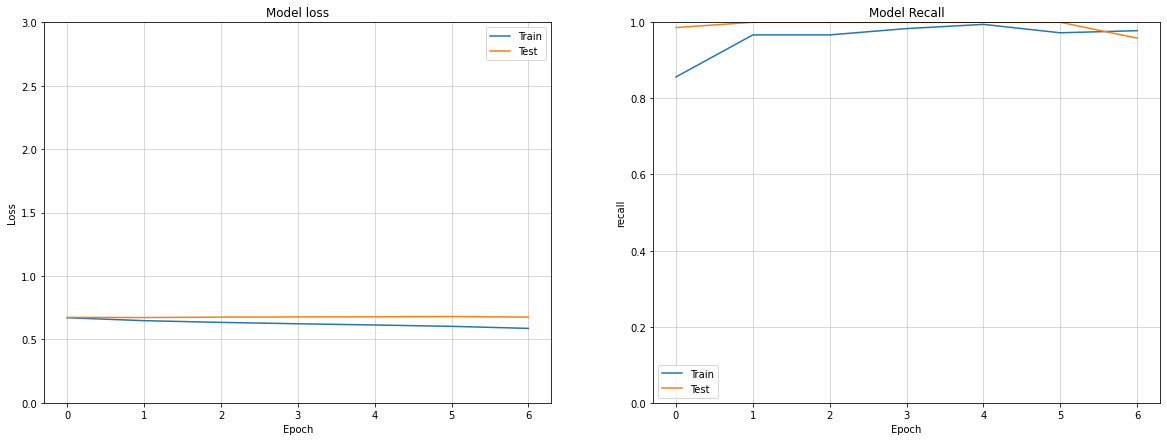

In [158]:
plot_loss_recall(model.history, title=None)

# Question to teachers

- Lementazing needed? yes--> reduce vocabulary_size in X_train
- Removing stop_words ---> yes.
- Why words in my X_train do not have embeddings with Word2Vec  --> depends on min_count
- keep (top 20) emojis by replacing with some word  instead of removing in data prep? 
- should we remove numbers in words? ex. "one"

- vector_size effect on embedding, not clear?---> seems like higher dimension better on most_similar words
-! transfer embedding vs "regular" embedding? 
TE = use pre-trained model to represent my data in N-dim
RE = use pre-defined NN to train on my data and represent in som N-dim ?

# Notes for myself

- !! some texts truncated example "yeah...." in sjekk
- remove "amp"--> stands for &
- Add confusion matrix

In [ ]:
# plt.figure(figsize=(6,6))
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# sns.heatmap(cm, square=True, annot=True, cbar=False,
#             xticklabels=['non-hate', 'hate'], yticklabels=['non-hate', 'hate'])
# plt.xlabel('Predicted label')
# plt.ylabel('True label')

## Transfer learning vs "simple" embedding

- As mentionned ealier, Word2vec trains an internal Neural network whose goal is to predict a word in a corpus
based on the words around it. This part of the sentence is called the window.
Its size corresponds to the number of word around word W used to predict this word W

- Instead of learning it on your training set (especially if it is very small), you can directly 
load a pretrained embedding


# Keras documentation

- padding : https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
- embedding: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding#example_2

# Gensim word2vec documentation

- https://radimrehurek.com/gensim/
- https://radimrehurek.com/gensim/models/word2vec.html#usage-examples
- https://radimrehurek.com/gensim/models/word2vec.html#usage-examples
- hyperparameters: https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Text8Corpus
- transfer learning : gensim-data repository.

# To do

- twick Embedding hyperparameters to improve score
- Understand the other layers and hyperparameters to tune
- Improve data cleaning part (lemantizing?)
- Run all on bigger datasett
- ++++

# Results

### Results_ss100_undersampling

| model_name | Embedding_type | validation_accuracy | test_accuracy|
| --- | --- | --- |---|
| | from scratch | 0.4167 |0.55|
| | w2v | 0.75 |0.65|
|  | w2vTF | 0.7083 |0.70|

In [ ]:
#0.6667  60.500

# Check embedding of emojis

https://github.com/uclnlp/emoji2vec

# Filtres

## Emojis (ironic vs hate)

## Capital word

## !!!!! min 5

## Abusive words

# Questions